In [1]:
# Essential libraries for data manipulation, visualization, and analysis
import pandas as pd  # Data handling with DataFrames
import numpy as np  # Numerical operations

# Visualization libraries
import matplotlib.pyplot as plt  # Static visualizations
import seaborn as sns  # Advanced statistical plots

# Machine learning preprocessing and metrics
from sklearn.preprocessing import RobustScaler  # Scaling robust to outliers
from sklearn.metrics import silhouette_score  # Clustering quality evaluation

# Machine learning models
from sklearn.linear_model import LinearRegression  # Linear regression
from sklearn.cluster import KMeans  # K-Means clustering

import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('supermarket_sales.csv') # Load the dataset

In [5]:
data.head()  # Displays the first 5 rows of the dataset

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [7]:
data.info()  # Provides a summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [9]:
numeric_columns = data.select_dtypes(include=['number'])  # Filters columns with numeric data types

In [11]:
# Calculating Statistical Moments
# These statistics provide valuable insights into the distribution and characteristics of the data.
stats_moments = pd.DataFrame({
    'Mean': numeric_columns.mean(),
    'Median': numeric_columns.median(),
    'Standard Deviation': numeric_columns.std(),
    'Skewness': numeric_columns.skew(),
    'Kurtosis': numeric_columns.kurt()})
stats_moments

,Mean,Median,Standard Deviation,Skewness,Kurtosis
Unit price,55.672130,55.230000,2.649463e+01,0.007077,-1.218591
Quantity,5.510000,5.000000,2.923431e+00,0.012941,-1.215547
Tax 5%,15.379369,12.088000,1.170883e+01,0.892570,-0.081885
Total,322.966749,253.848000,2.458853e+02,0.892570,-0.081885
cogs,307.587380,241.760000,2.341765e+02,0.892570,-0.081885
gross margin percentage,4.761905,4.761905,6.131498e-14,0.000000,0.000000
gross income,15.379369,12.088000,1.170883e+01,0.892570,-0.081885
Rating,6.972700,7.000000,1.718580e+00,0.009010,-1.151587


In [29]:
def draw_corr_heatmap(df):
    """
    GeneratesGenerates a correlation heatmap for numerical columns in the dataset. displaying triangle of correlations.
    """
    # Calculate the correlation matrix
    corr_matrix = df.corr()
    
    # Mask the half of the correlation matrix
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    # Create the heatmap with the mask applied
    plt.figure(figsize=(10, 8), dpi=150)
    sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='coolwarm', fmt=".2f", cbar=True, vmin=-1, vmax=1)
    plt.title('Half Correlation Heatmap', fontsize=14)
    plt.tight_layout()
    plt.show()

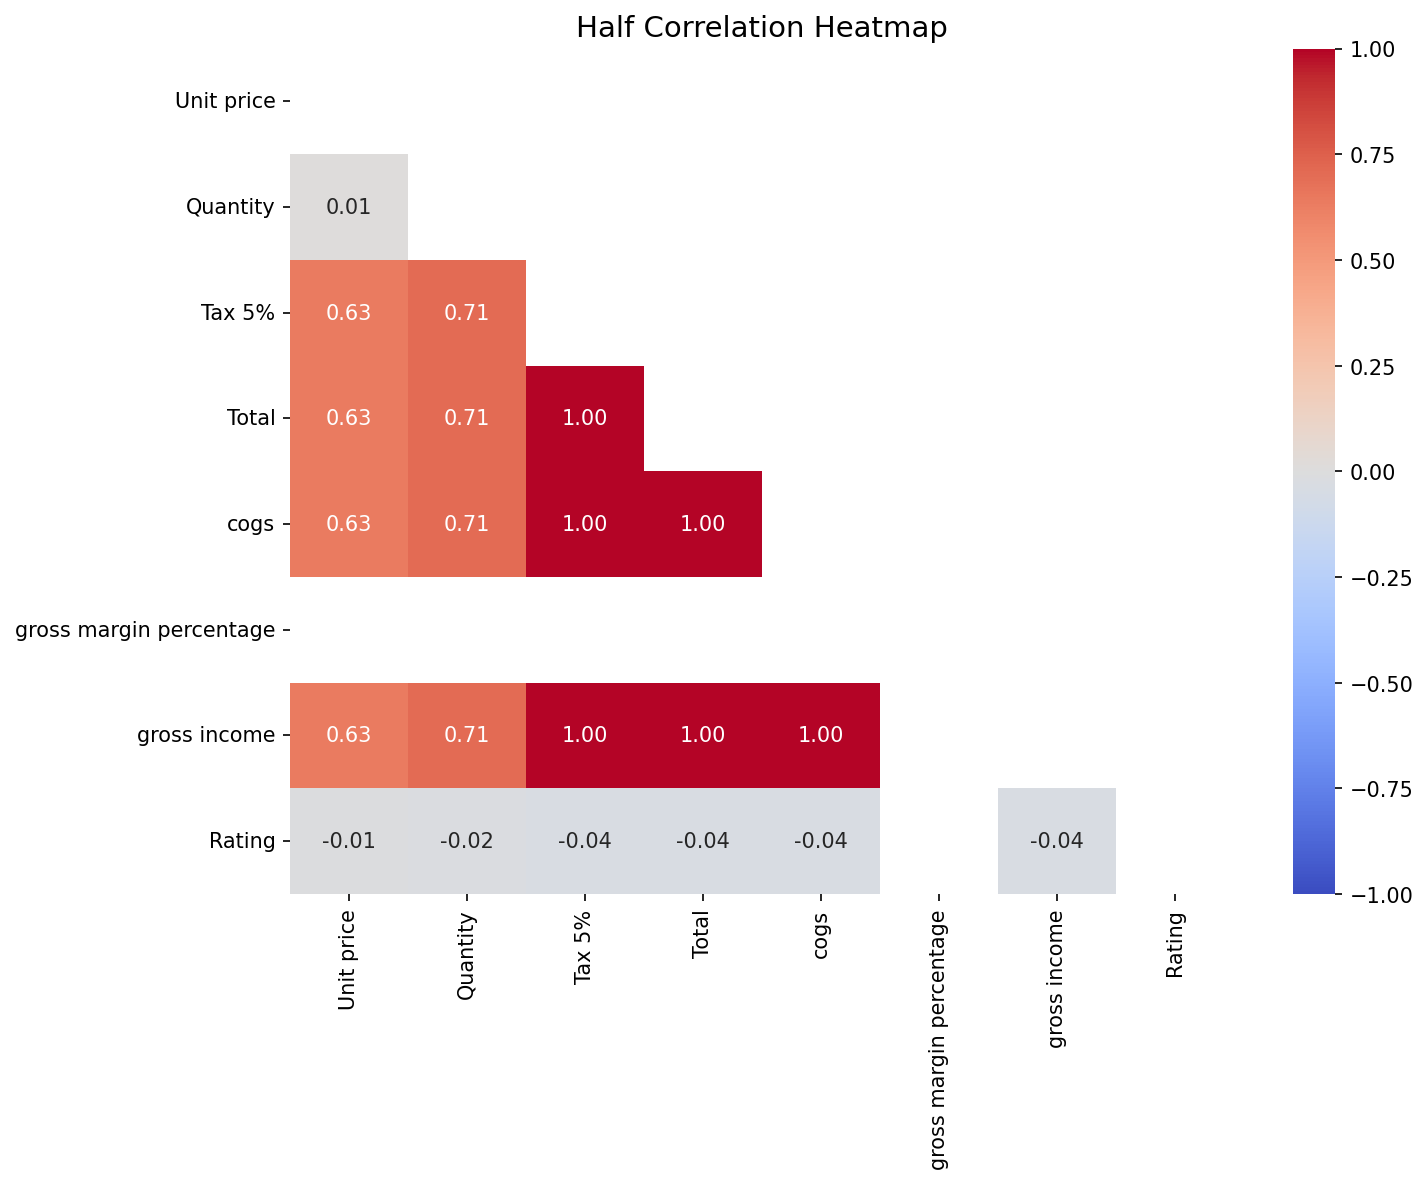

In [31]:
draw_corr_heatmap(numeric_columns)

In [37]:
def plot_payment_distribution_pie(df):
    """
    Creates a pie chart showing the distribution of Payment Method.
    """
    payment_method_counts = df['Payment'].value_counts()  # Count occurrences of each payment method

    plt.figure(figsize=(8, 8))
    payment_method_counts.plot.pie(
        autopct='%1.1f%%',  # Display percentages
        colors=sns.color_palette('coolwarm', len(payment_method_counts)),  # Use a different color palette
        startangle=140,  # Rotate the pie chart for better alignment
        wedgeprops={'edgecolor': 'black'},  # Add edge color for better visibility
        textprops={'fontsize': 12}  # Adjust text font size
    )
    plt.title("Distribution of Payments by Method", fontsize=16, pad=20)
    plt.ylabel("")  # Remove the y-axis label
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()


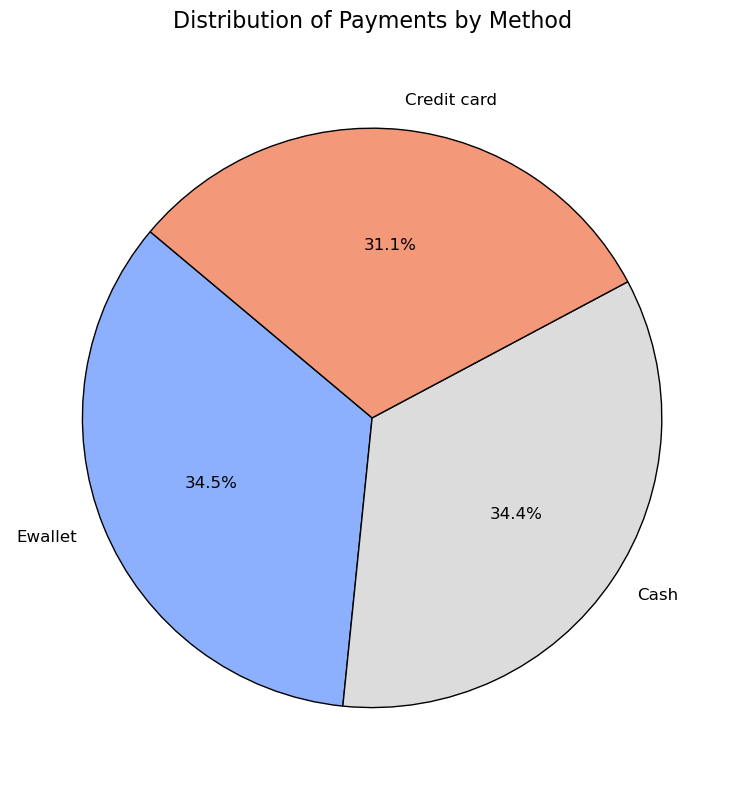

In [41]:
plot_payment_distribution_pie(data)

In [43]:
def simple_linear_fit_with_predictions(df, independent_var, dependent_var, new_data=None):
    """
    Fits a simple linear regression model, plots the regression line with confidence intervals, 
    and optionally predicts values for new data points.
    
    Parameters:
    - df : DataFrame : The dataset containing the data.
    - independent_var : str : The name of the independent variable (feature).
    - dependent_var : str : The name of the dependent variable (target).
    - new_data : array-like, optional : New data points to predict. Default is None.
    
    Returns:
    - model : LinearRegression : The trained linear regression model.
    - predictions : array-like : Predictions for new data points (if provided).
    """
    # Step 1: Extract data for independent and dependent variables
    X = df[independent_var].values.reshape(-1, 1)  # Reshape to 2D for modeling
    y = df[dependent_var].values  # Dependent variable (target)

    # Step 2: Train the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Step 3: Generate predictions for the original data
    y_pred = model.predict(X)

    # Step 4: Predict values for new data points, if provided
    predictions = None
    if new_data is not None:
        new_data = np.array(new_data).reshape(-1, 1)
        predictions = model.predict(new_data)
        print("Predictions for new data points:")
        for i, pred in enumerate(predictions):
            print(f"  {independent_var} = {new_data[i][0]:.2f}, Predicted {dependent_var} = {pred:.2f}")

    # Step 5: Plot the regression line and data points
    plt.figure(figsize=(10, 6))
    sns.regplot(
        x=X.flatten(),
        y=y,
        ci=95,
        scatter_kws={'color': 'green', 's': 50, 'alpha': 0.6},
        line_kws={'color': 'orange', 'linewidth': 3, 'linestyle': '-.'}
    )

    # Title and labels
    plt.title(f'Linear Regression of {dependent_var} vs {independent_var}', fontsize=16)
    plt.xlabel(independent_var, fontsize=14)
    plt.ylabel(dependent_var, fontsize=14)
    plt.legend(['Data points', 'Regression line', 'Confidence interval'], loc='upper left', fontsize=12)

    # Customize grid and layout
    plt.grid(True, linestyle=':', alpha=0.5)
    plt.tight_layout()

    # Show the plot
    plt.show()

    return model, predictions

Predictions for new data points:
  Unit price = 40.00, Predicted Tax 5% = 10.99
  Unit price = 45.00, Predicted Tax 5% = 12.39
  Unit price = 30.00, Predicted Tax 5% = 8.19


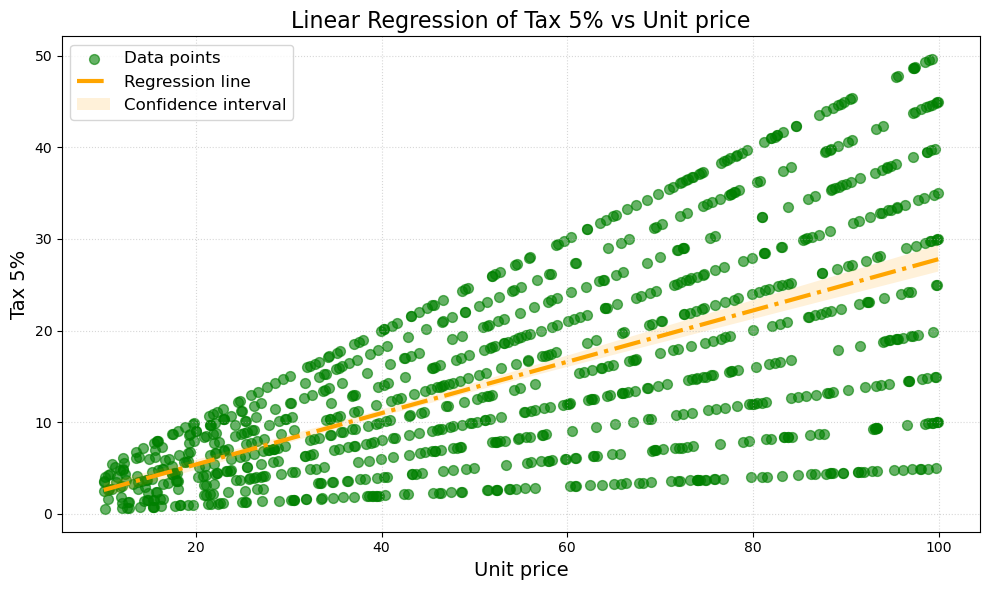

In [49]:
new_data = [40,45,30]  # New x-values for prediction
model, new_y_pred = simple_linear_fit_with_predictions(data,'Unit price','Tax 5%', new_data)

In [57]:
# Select relevant columns for clustering
data_for_clustering = data[['Unit price','Tax 5%']].dropna()  # Drop rows with missing values

# Scale the data using RobustScaler
scaler = RobustScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

In [59]:
def compute_silhouette_and_inertia(cluster_count, data):
    """ 
    Calculates silhouette score and inertia for a given number of clusters.
    """
    kmeans_model = KMeans(n_clusters=cluster_count, n_init=20)
    kmeans_model.fit(data)  # Fit the model to the data
    labels = kmeans_model.labels_
    
    # Calculate silhouette score and inertia
    silhouette = silhouette_score(data, labels)
    inertia = kmeans_model.inertia_

    return silhouette, inertia


In [61]:
wcss_values = []
optimal_cluster_count, best_silhouette_score = None, -np.inf

# Loop through possible cluster counts and calculate silhouette score and inertia
for clusters in range(2, 11):  # Test from 2 to 10 clusters
    silhouette, inertia = compute_silhouette_and_inertia(clusters, scaled_data)
    wcss_values.append(inertia)
    
    # Update the best silhouette score and optimal cluster count
    if silhouette > best_silhouette_score:
        optimal_cluster_count = clusters
        best_silhouette_score = silhouette
        
    print(f"{clusters} clusters silhouette score = {silhouette:.2f}")

print(f"Optimal number of clusters = {optimal_cluster_count}")


2 clusters silhouette score = 0.49
3 clusters silhouette score = 0.45
4 clusters silhouette score = 0.46
5 clusters silhouette score = 0.42
6 clusters silhouette score = 0.41
7 clusters silhouette score = 0.40
8 clusters silhouette score = 0.39
9 clusters silhouette score = 0.38
10 clusters silhouette score = 0.38
Optimal number of clusters = 2


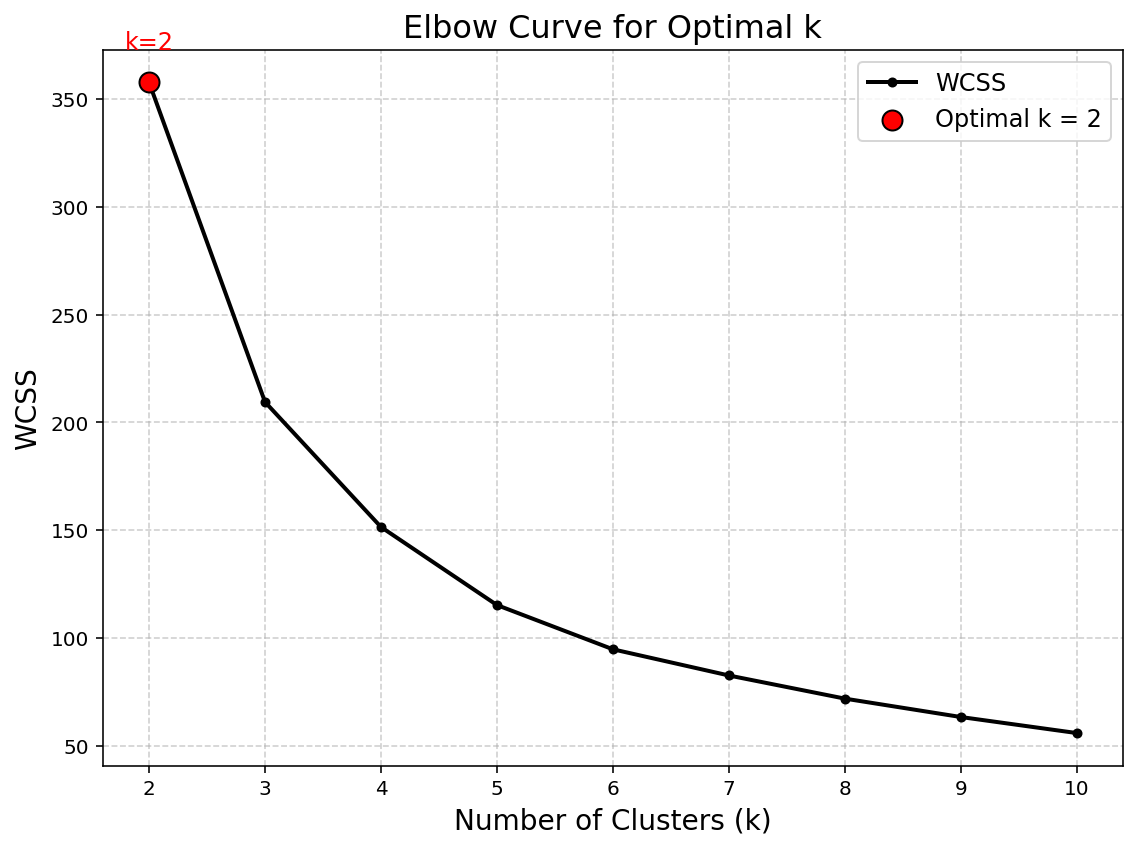

In [82]:
def plot_elbow_curve(min_clusters, max_clusters, wcss_values, optimal_clusters):
    """
    Plots the elbow curve to determine the best number of clusters (k).
    Parameters:
    - min_clusters (int): The minimum number of clusters to consider.
    - max_clusters (int): The maximum number of clusters to consider.
    - wcss_values (list or array): List of Within-Cluster Sum of Squares for each k.
    - optimal_clusters (int): The optimal number of clusters as determined by silhouette score.
    """
    # Create a plot
    fig, ax = plt.subplots(figsize=(8, 6), dpi=144)
    
    # Plot WCSS values with black line
    cluster_range = range(min_clusters, max_clusters + 1)
    ax.plot(cluster_range, wcss_values, marker='.', color='black', label='WCSS', markersize=8, linewidth=2)
    
    # Mark the optimal number of clusters with crosses
    ax.scatter(optimal_clusters, wcss_values[optimal_clusters - min_clusters], color='red', edgecolor='black', s=100, zorder=5, marker='o', label=f'Optimal k = {optimal_clusters}')
    ax.annotate(
        f'k={optimal_clusters}',
        xy=(optimal_clusters, wcss_values[optimal_clusters - min_clusters]),
        xytext=(optimal_clusters, wcss_values[optimal_clusters - min_clusters] + (max(wcss_values) - min(wcss_values)) * 0.05),
        fontsize=12,
        color='red',
        ha='center'
    )
    
    # Customize plot
    ax.set_xlabel('Number of Clusters (k)', fontsize=14)
    ax.set_ylabel('WCSS', fontsize=14)
    ax.set_title('Elbow Curve for Optimal k', fontsize=16)
    ax.set_xticks(cluster_range)
    ax.grid(True, linestyle='--', alpha=0.6)
    
    # Display legend
    ax.legend(fontsize=12)
    
    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

# Plot the elbow curve
plot_elbow_curve(2, 10, wcss_values, optimal_cluster_count)


In [83]:
def simple_clustering(df, x_col, y_col, n_clusters=2):
    """
    Performs K-Means clustering on two specified columns and visualizes the clusters.
    """
    # Step 1: Extract the features
    data = df[[x_col, y_col]].values
    
    # Step 2: Fit the KMeans model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data)
    
    # Step 3: Add cluster labels to the DataFrame
    df['Cluster'] = labels
    
    # Step 4: Visualize the clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x=x_col, y=y_col, hue='Cluster', data=df, palette='viridis', s=100, alpha=0.8, edgecolor='k'
    )
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                s=200, c='red', label='Centroids', marker='X')
    plt.title(f'Clustering of {x_col} vs {y_col} with {n_clusters} Clusters', fontsize=16)
    plt.xlabel(x_col, fontsize=12)
    plt.ylabel(y_col, fontsize=12)
    plt.legend(title='Cluster', fontsize=10)
    plt.grid(alpha=0.5, linestyle='--')
    plt.tight_layout()
    plt.show()
    
    return kmeans

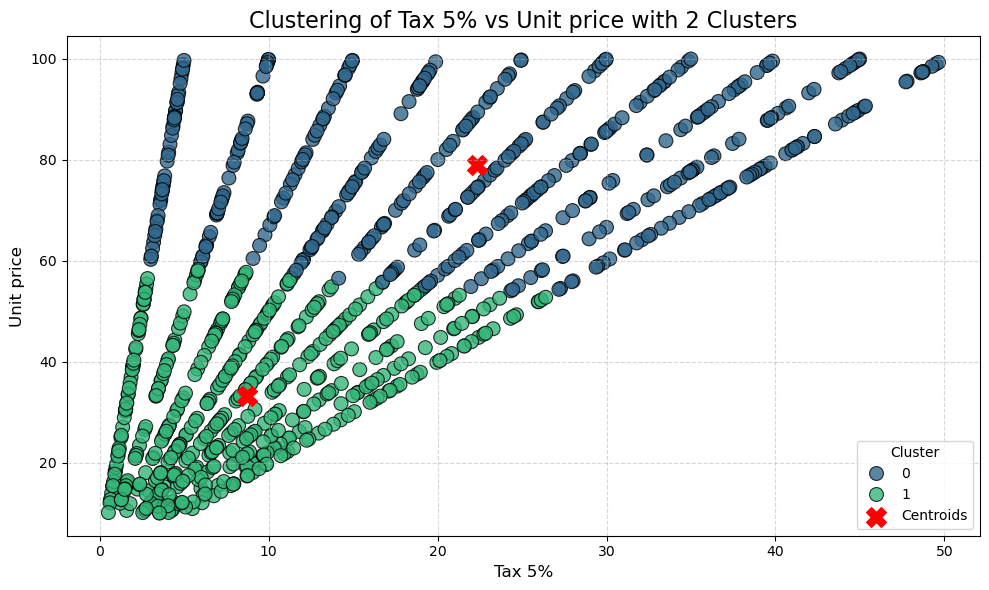

In [86]:
# Perform clustering on 'Tax 5%' and 'Unit price' with 3 clusters
kmeans_model = simple_clustering(data, x_col='Tax 5%', y_col='Unit price', n_clusters=2)